<a href="https://colab.research.google.com/github/Violalin-code/Test2/blob/main/VLExam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Replace 'path/to/your/file.xlsx' with the actual path to your Excel file
file_path = '/content/Test2_dataset.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

# Print the first few rows of the DataFrame to verify the upload
print(df.head())

             Catalyst  Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  \
0         Ni−SiO2‑550                  0.15                   650        10.0   
1         Ni−SiO2‑750                  0.15                   650        10.0   
2   Ni/Sn0.2−SiO2‑550                  0.15                   650        10.0   
3   Ni/Sn0.2−SiO2‑750                  0.15                   650        10.0   
4  Ni/Sn0.05−SiO2‑550                  0.15                   650        10.0   

   Reaction Time  Pore Size  Pore Volume  Surface Area  \
0            0.5        4.7         0.58         476.0   
1            0.5        4.7         0.58         476.0   
2            0.5        5.2         0.58         455.0   
3            0.5        5.2         0.58         455.0   
4            0.5        4.8         0.82         599.0   

   H2-TPR Peak Temperature  Ni Particle Size  Ni Dispersion  \
0                    640.0               2.9            NaN   
1                    640.0            

In [2]:
#View the first few rows:
df.head()


,Catalyst,Ratio of CH4 in Feed,Reaction Temperature,Ni Loading,Reaction Time,Pore Size,Pore Volume,Surface Area,H2-TPR Peak Temperature,Ni Particle Size,Ni Dispersion,Modifier Electronegativity,GHSV,CH4 Conversion,CO2 Conversion,Syngas_Ratio
0,Ni−SiO2‑550,0.15,650,10.0,0.5,4.7,0.58,476.0,640.0,2.9,NaN,1.96,60000,68.5,73.6,0.7
1,Ni−SiO2‑750,0.15,650,10.0,0.5,4.7,0.58,476.0,640.0,4.6,NaN,1.96,60000,66.9,72.4,0.7
2,Ni/Sn0.2−SiO2‑550,0.15,650,10.0,0.5,5.2,0.58,455.0,457.0,2.9,NaN,1.96,60000,18.4,26.1,1.0
3,Ni/Sn0.2−SiO2‑750,0.15,650,10.0,0.5,5.2,0.58,455.0,457.0,4.6,NaN,1.96,60000,14.6,19.9,0.9
4,Ni/Sn0.05−SiO2‑550,0.15,650,10.0,0.5,4.8,0.82,599.0,558.0,3.9,NaN,1.96,60000,61.3,74.0,0.7


In [3]:
# Check for missing values
has_missing_values = df.isnull().values.any()

if has_missing_values:
    print("Missing values are present in the dataset.")
else:
    print("No missing values found in the dataset.")

Missing values are present in the dataset.


In [4]:
df.dropna()  # Drops rows with missing values
df.dropna(axis=1)  # Drops columns with missing values

#Check for missing data
missing_data = df.isnull().sum()
#Display columns with missing data
missing_data[missing_data > 0]

,0
Ni Dispersion,1056
CH4 Conversion,49
CO2 Conversion,77
Syngas_Ratio,76


In [5]:
#Print the dataset's columns
print(df.columns)

#Check the data type to identify numeric columns
df.dtypes

Index(['Catalyst', 'Ratio of CH4 in Feed', 'Reaction Temperature',
       'Ni Loading', 'Reaction Time', 'Pore Size', 'Pore Volume',
       'Surface Area', 'H2-TPR Peak Temperature', 'Ni Particle Size',
       'Ni Dispersion', 'Modifier Electronegativity', 'GHSV', 'CH4 Conversion',
       'CO2 Conversion', 'Syngas_Ratio'],
      dtype='object')


,0
Catalyst,object
Ratio of CH4 in Feed,float64
Reaction Temperature,int64
Ni Loading,float64
Reaction Time,float64
Pore Size,float64
Pore Volume,float64
Surface Area,float64
H2-TPR Peak Temperature,float64
Ni Particle Size,float64


In [6]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['float', 'int']).columns

# Identify categorical columns (assuming they are of type 'object')
categorical_columns = df.select_dtypes(include=['object']).columns

#Change Plant capacity (kg/hr) to float
df['Reaction Temperature'] = df['Reaction Temperature'].astype(float)
df['GHSV'] = df['GHSV'].astype(float)
print(df.dtypes)  # Check the data types to confirm the change

Catalyst                       object
Ratio of CH4 in Feed          float64
Reaction Temperature          float64
Ni Loading                    float64
Reaction Time                 float64
Pore Size                     float64
Pore Volume                   float64
Surface Area                  float64
H2-TPR Peak Temperature       float64
Ni Particle Size              float64
Ni Dispersion                 float64
Modifier Electronegativity    float64
GHSV                          float64
CH4 Conversion                float64
CO2 Conversion                float64
Syngas_Ratio                  float64
dtype: object


In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns

#Display categorical columns
categorical_columns

#Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

#Display the first few rows of the enncoded dataset
df_encoded.head()

,Ratio of CH4 in Feed,Reaction Temperature,Ni Loading,Reaction Time,Pore Size,Pore Volume,Surface Area,H2-TPR Peak Temperature,Ni Particle Size,Ni Dispersion,...,Catalyst_Y–2%Nd2O3,Catalyst_Y–2.5%Nd2O3,Catalyst_Y–3%Nd2O3,Catalyst_Y–3.5%Nd2O3,Catalyst_Y–4%Nd2O,Catalyst_Y–Ni/SBA-16-MgO,Catalyst_Zr (10)-Ni(15)/ perlite,"Catalyst_Zr (20)-Ni(15)/perlite,",Catalyst_ZrO2/10Ni/SBA-15,Catalyst_–Ni–La2O3
0,0.15,650.0,10.0,0.5,4.7,0.58,476.0,640.0,2.9,NaN,...,False,False,False,False,False,False,False,False,False,False
1,0.15,650.0,10.0,0.5,4.7,0.58,476.0,640.0,4.6,NaN,...,False,False,False,False,False,False,False,False,False,False
2,0.15,650.0,10.0,0.5,5.2,0.58,455.0,457.0,2.9,NaN,...,False,False,False,False,False,False,False,False,False,False
3,0.15,650.0,10.0,0.5,5.2,0.58,455.0,457.0,4.6,NaN,...,False,False,False,False,False,False,False,False,False,False
4,0.15,650.0,10.0,0.5,4.8,0.82,599.0,558.0,3.9,NaN,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#Display summary statistics
summary_statistics = df.describe()
print(summary_statistics)

#Assuming df_encoded is your dataset after one-hot encoding
encoded_columns = [col for col in df_encoded.columns if col not in df.columns]

#print encoded column to verify
print("One-hot encoded columns:")
print(encoded_columns)

#Exclude one-hot encoded column from the dataset
df_no_encoding = df_encoded.drop(columns=encoded_columns)

       Ratio of CH4 in Feed  Reaction Temperature   Ni Loading  Reaction Time  \
count           1714.000000           1714.000000  1714.000000    1714.000000   
mean               0.369862            703.477246     9.337069      16.289964   
std                0.145389             86.778888     5.714180      22.749978   
min                0.050000            400.000000     0.300000       0.100000   
25%                0.250000            650.000000     5.000000       0.500000   
50%                0.400000            700.000000     9.670000       7.000000   
75%                0.500000            750.000000    10.220000      24.000000   
max                0.500000           1000.000000    60.000000     200.000000   

         Pore Size  Pore Volume  Surface Area  H2-TPR Peak Temperature  \
count  1714.000000  1714.000000   1714.000000              1714.000000   
mean     11.574593     0.402755    188.477548               632.727211   
std      10.576940     0.289400    174.102440   

In [33]:
Q1 = df['Ratio of CH4 in Feed'].quantile(0.25)
Q3 = df['Ratio of CH4 in Feed'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers = df[(df['Ratio of CH4 in Feed'] < lower_bound) | (df['Ratio of CH4 in Feed'] > upper_bound)]

df = df[(df['Ratio of CH4 in Feed'] >= lower_bound) & (df['Ratio of CH4 in Feed'] <= upper_bound)]
df['Ratio of CH4 in Feed'] = df['Ratio of CH4 in Feed'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

In [35]:
Q1 = df['Reaction Temperature'].quantile(0.25)
Q3 = df['Reaction Temperature'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers_ReactionTemperature = df[(df['Reaction Temperature'] < lower_bound) | (df['Reaction Temperature'] > upper_bound)]

df = df[(df['Reaction Temperature'] >= lower_bound) & (df['Reaction Temperature'] <= upper_bound)]
df['Reaction Temperature'] = df['Reaction Temperature'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

In [39]:
Q1 = df['Ni Loading'].quantile(0.25)
Q3 = df['Ni Loading'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers_Ni_Loading = df[(df['Ni Loading'] < lower_bound) | (df['Ni Loading'] > upper_bound)]

df = df[(df['Ni Loading'] >= lower_bound) & (df['Ni Loading'] <= upper_bound)]
df['Ni Loading'] = df['Ni Loading'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

In [40]:
Q1 = df['Reaction Time'].quantile(0.25)
Q3 = df['Reaction Time'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers_Reaction_Time = df[(df['Reaction Time'] < lower_bound) | (df['Reaction Time'] > upper_bound)]

df = df[(df['Reaction Time'] >= lower_bound) & (df['Reaction Time'] <= upper_bound)]
df['Reaction Time'] = df['Reaction Time'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

<ipython-input-40-fc2a576c817d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reaction Time'] = df['Reaction Time'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)


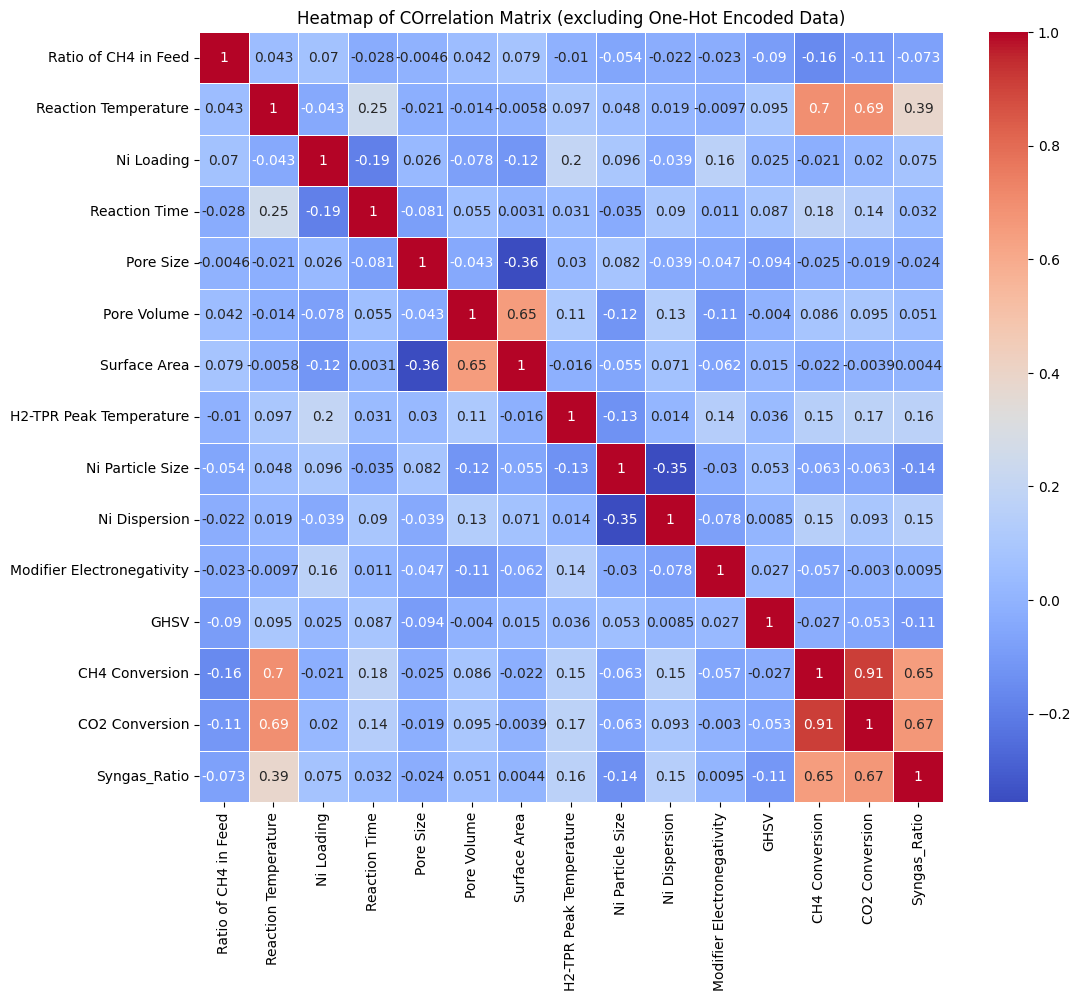

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#plot a heatmap excluding the one-hot encoded columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_no_encoding.corr(), annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Heatmap of COrrelation Matrix (excluding One-Hot Encoded Data)')
plt.show()

#Positive correlation between reaction temperature and CH4 coversion, and Co2 Conversion
#Positive correlation between Co2 conversion and Ch4 conversion
#there is also positive correlatons between Co2 conversion and syngas ratios

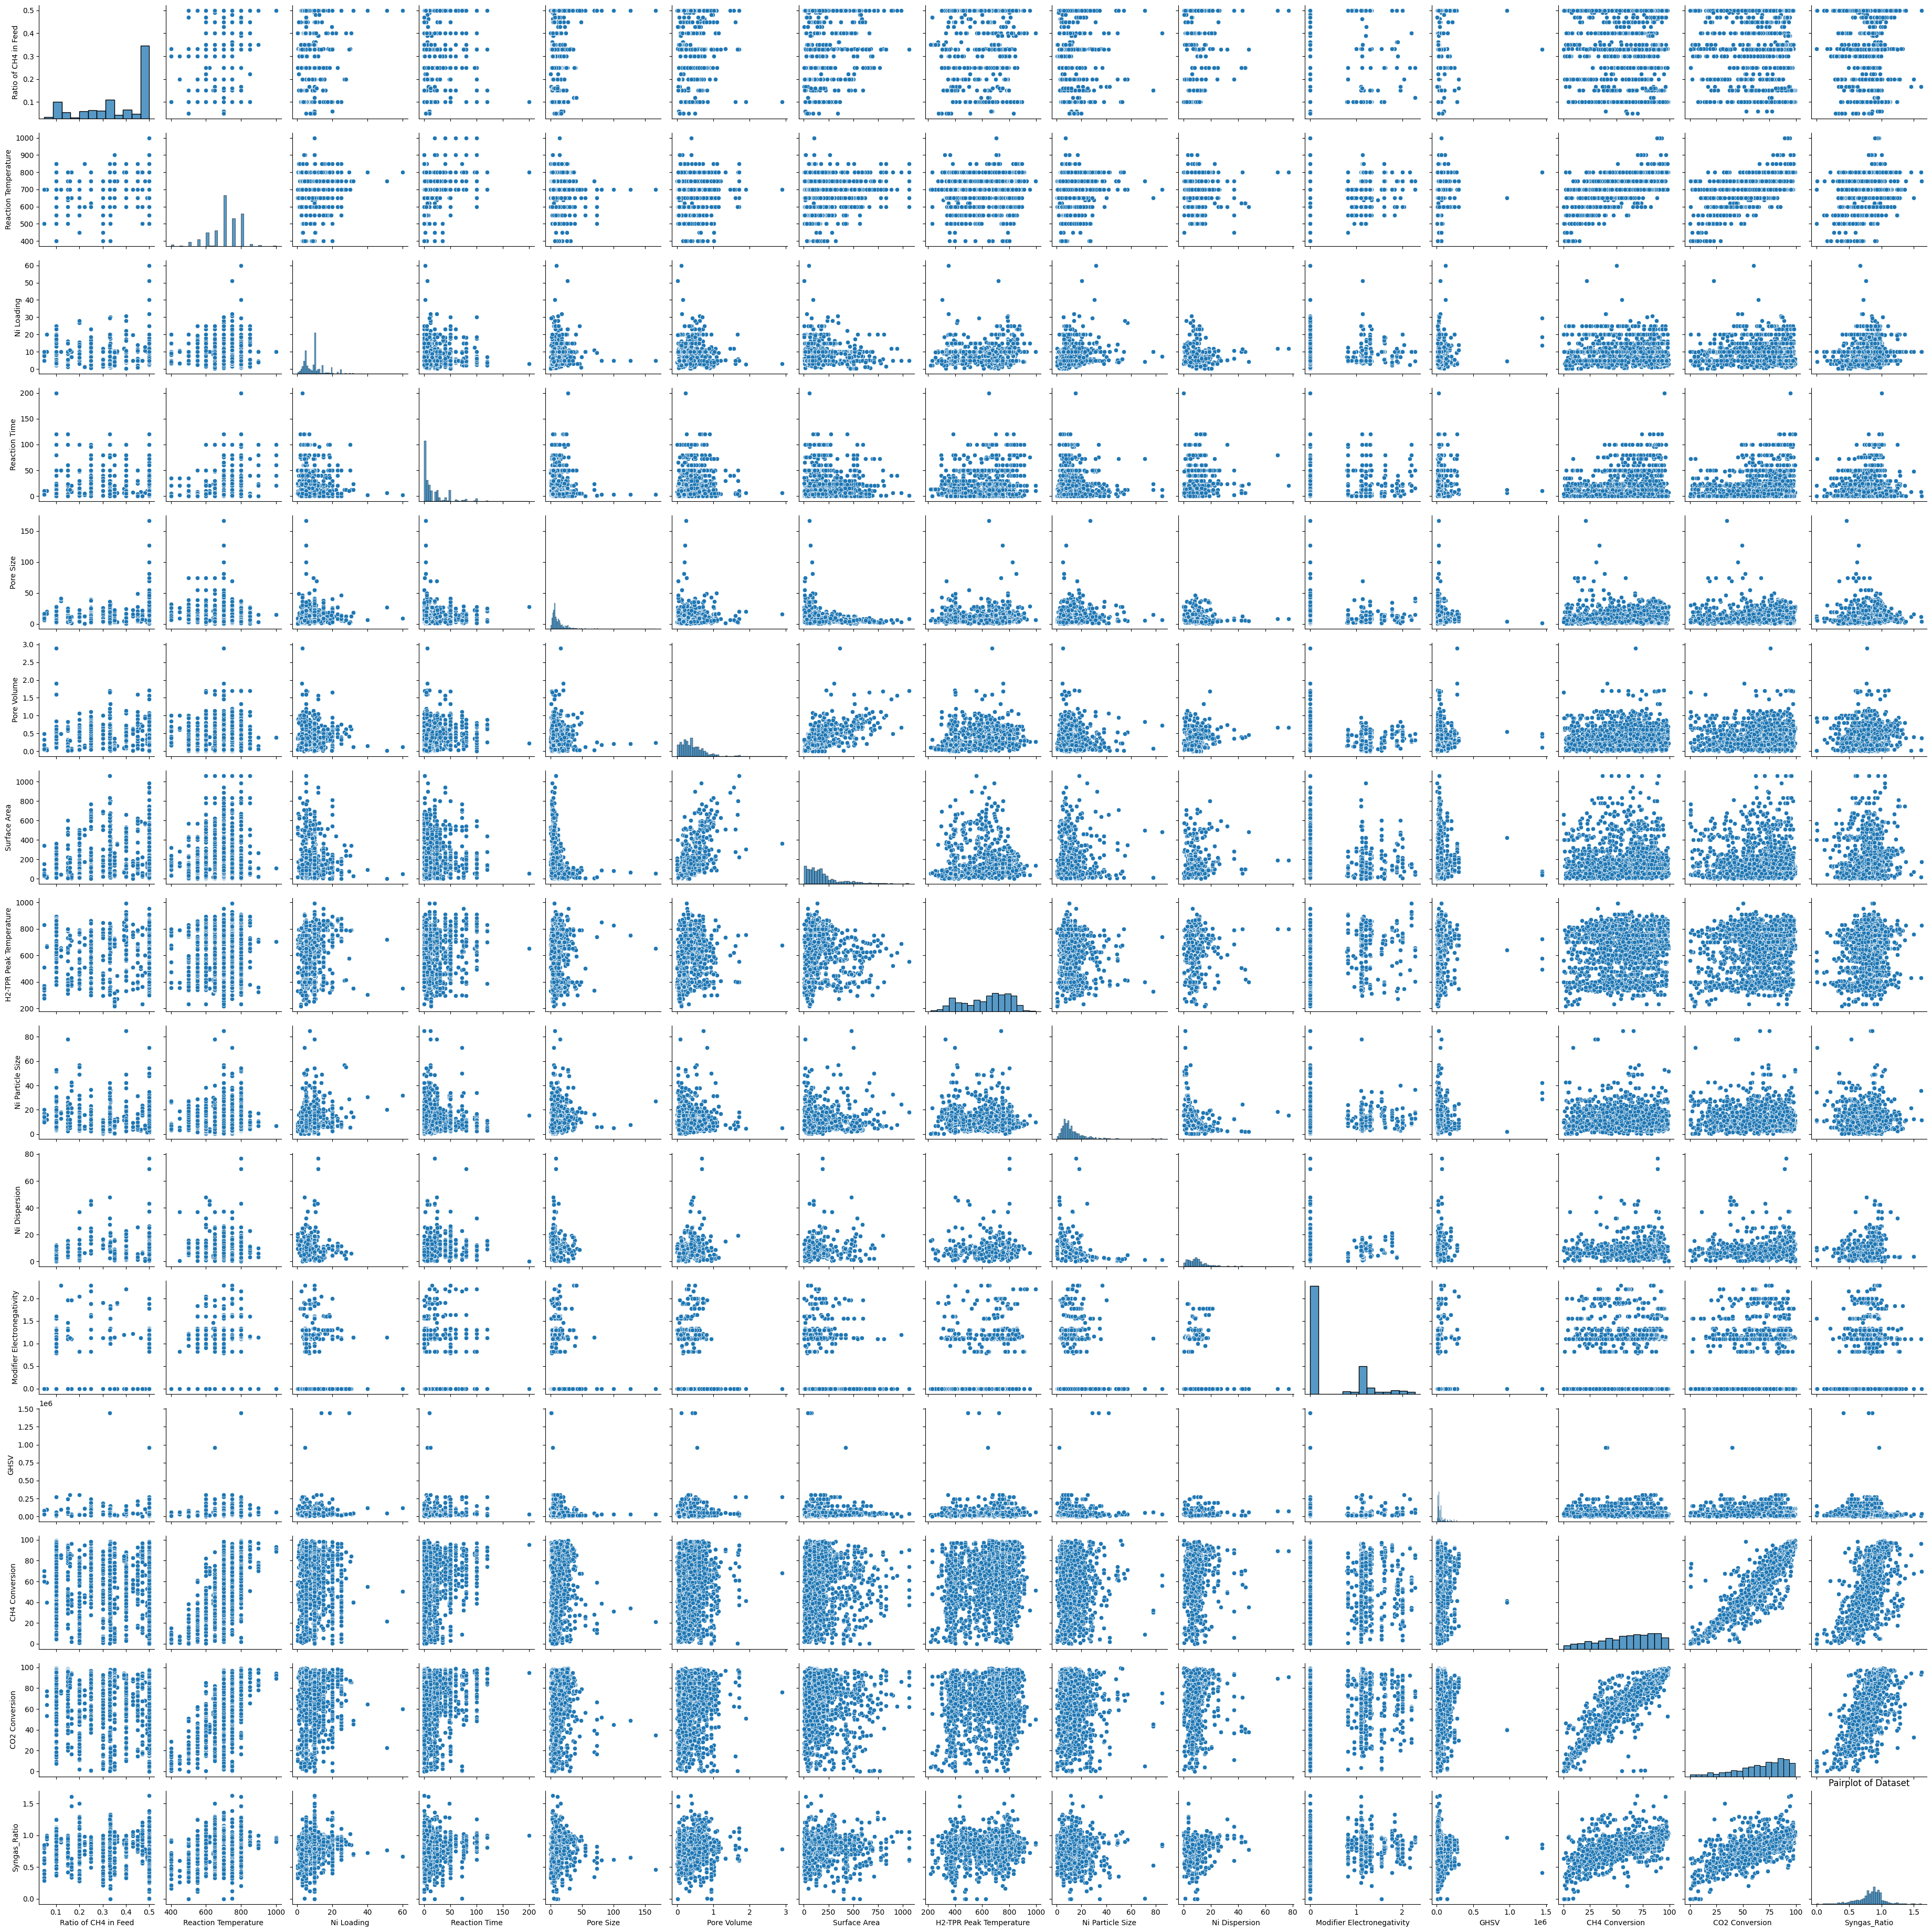

In [10]:
#plot a pairplot to visualize relationship between variables
sns.pairplot(df)
plt.title('Pairplot of Dataset')
plt.show()